# M507 Methods of Prediction - Léonie Lavaert

## Introduction

Within the food industry, food quality is a very important term. Quality control is one of the crucial aspects in the process of producing food while it ensures the safety and well-being of consumers (Koo, 2021). In addition to ensuring the health of consumers, quality control is also good for the reputation of a brand resulting in increased sales and better production techniques (Makomba, 2021). In the potato chip industry, it is no different in addition, the visual aspect is also very crucial. During the frying, the color of the potato chips changes and it is an important quality parameter. Not only for the acceptance of the product by the consumers but it also reflects the amount of acrylamide in the potato chip (Pedreschi, Mery and Marique, 2016). Acrylamide is formed during the frying process of the potato and while this substance affects human health in a negative way the Food and Drug Administration (FDA) monitors those levels (Nutrition, 2021). While controlling every potato chip can be very time-consuming, computer vision (CV) is playing an important role in automating the process (Pedreschi, Mery and Marique, 2016). With the help of a convolutional neural network (CNN) images of potato chips can be processed and classified into different categories. According to Statista (2017), PepsiCo is the leading company in producing potato chips. With the help of cameras, images of the potato chips could be collected and used as data for building the network. Having an automated visual quality control would result in a more effective time-saving process for PepsiCo ensuring high quality. Besides, it will result in increased customer satisfaction, better brand reputation and eventually increase sales. 

## Importing libraries

In order to have a well-operating pipeline, all the needed libraries are first imported.

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

2022-12-22 09:30:10.170910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-22 09:30:10.170942: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Loading dataset

To create this model, images of both good quality and bad quality potato chips are needed. Therefore, the dataset of Usama Navid that can be found on Kaggle is used. The dataset can be accessed with the following URL: https://www.kaggle.com/datasets/concaption/pepsico-lab-potato-quality-control. 

The dataset consists of two directories test and train which both hold two folders with images of defective and non-defective potato chips. In the next step, a tf.data.Dataset is generated with the help of the TensorFlow util "image_dataset_from_directory". That dataset yields batches of 32 images with the size (256, 256) and color mode RGB from the subdirectories Defective and Not Defective, together with labels 0 and 1. Tensorflow automatically uses the names of the directories to label the data. Defective corresponding with label 0 and Not Defective with label 1. The test dataset will be kept until the end to evaluate if the model is performing well.

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory("Dataset_B/Train")
test_data = tf.keras.utils.image_dataset_from_directory("Dataset_B/Test")

Found 769 files belonging to 2 classes.
Found 192 files belonging to 2 classes.


2022-12-22 09:30:16.095232: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-22 09:30:16.095268: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-22 09:30:16.095295: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ubuntu-1804-bionic-64-minimal): /proc/driver/nvidia/version does not exist
2022-12-22 09:30:16.095708: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data exploration

To understand the distribution, size and characteristics of the image data, a data exploration step is needed. Therefore the training data is being explored. As visible above the training dataset consists of 769 files belonging to 2 classes. With the next piece of code, it is possible to see the names of the classes.

In [3]:
class_names = train_data.class_names
print(class_names)

['Defective', 'Not Defective']


In order to see if the data is imbalanced or not the next piece of code prints the number of images in each directory.

In [4]:
lst_def = os.listdir("Dataset_B/Train/Defective")
lst_not = os.listdir("Dataset_B/Train/Not Defective")
number_files_def = len(lst_def)
number_files_not = len(lst_not)

print(f"number of images of Defective potato chips: {number_files_def}")
print(f"number of images of Not Defective potato chips: {number_files_not}")

number of images of Defective potato chips: 369
number of images of Not Defective potato chips: 400


In what is visible above it is clear that the classes are balanced, they consists of an almost even number of images. Therefore, balancing the data will not be necessary.

To inspect the batches of the training data, the data need to be converted into a numpy iterator. This happens in the next step where a data iterator is created. With this data iterator looping through batches is possible and the data can be generated. It is possible to get batches consecutively with the .next method.

In [5]:
data_iterator = train_data.as_numpy_iterator()

In [6]:
batch = data_iterator.next() 
batch

(array([[[[228.     , 229.625  , 223.3125 ],
          [227.     , 230.     , 223.     ],
          [226.     , 231.     , 224.     ],
          ...,
          [226.     , 227.     , 219.     ],
          [226.     , 227.     , 219.     ],
          [227.     , 229.     , 218.     ]],
 
         [[226.9375 , 227.9375 , 221.9375 ],
          [226.     , 229.     , 222.     ],
          [226.97266, 229.97266, 222.97266],
          ...,
          [225.97266, 226.97266, 218.97266],
          [226.9414 , 227.9414 , 219.9414 ],
          [226.     , 227.     , 219.     ]],
 
         [[228.30078, 229.30078, 223.30078],
          [229.03516, 230.03516, 224.03516],
          [227.     , 230.     , 223.     ],
          ...,
          [225.     , 227.     , 216.     ],
          [225.     , 227.     , 216.     ],
          [226.     , 227.     , 219.     ]],
 
         ...,
 
         [[210.61328, 211.61328, 203.61328],
          [209.03516, 210.03516, 204.03516],
          [209.3164 , 210.3164

In [7]:
len(batch)

2

In [8]:
batch[0].shape

(32, 256, 256, 3)

In [9]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

The batch consists of two parts. The first part contains the images from the directory as a set of numpy arrays. After printing the shape it is possible to see that the batch conists of 32 images of the size (256, 256, 3), which was defined when loading in the dataset. The three channels represent the RGB color mode. The values of the RGB channel go between 0 and 255. It will be important in the preprocessing step of our pipeline to rescale the images.

In [10]:
batch[1]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int32)

The second part of the batch contains the labels of the images. 0 being defective and 1 being not defective. 

In what follows the 5 first images of our batch are visualized. It is possible to see the labels assigned to the images as well as the size of the image. 

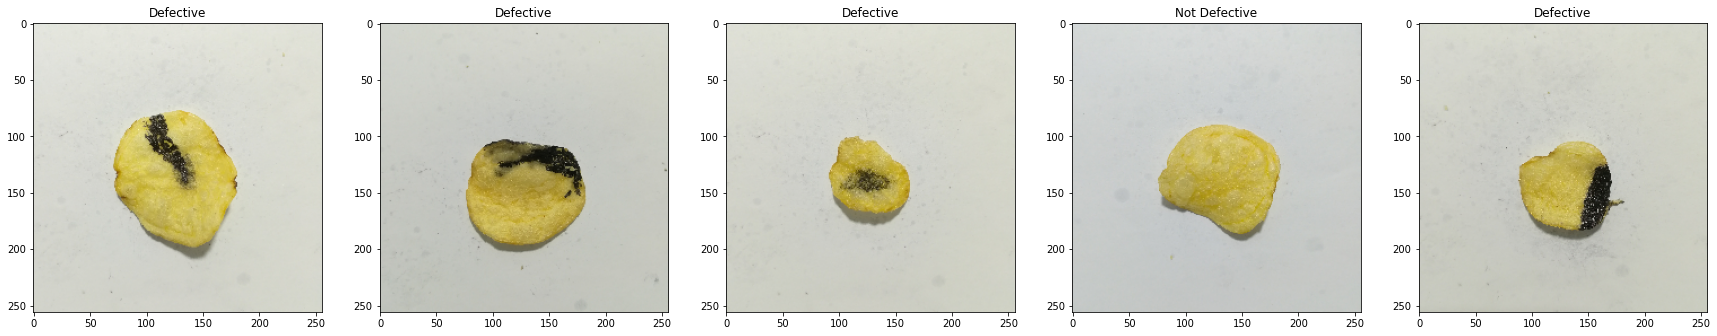

In [11]:
fig, ax = plt.subplots(ncols=5, figsize=(30,30))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])

## Preprocessing

During the data exploration step it became clear that rescaling the images is necessary. tf.data.Dataset has a method called map with which it is possible to apply a function for every element of the dataset. This method will return a new dataset containing the transformed images. This function will devide the image data by 255 to standerdize it. This should result in values going from 0-1. This function is applied on both training and test data.

In [12]:
train_data = train_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))

In [13]:
train_data.as_numpy_iterator().next()[0].min(), train_data.as_numpy_iterator().next()[0].max()

(0.0, 1.0)

To verify whether this was performed correctly, a new batch of the training data was generated and the minimum and maximum values were calculated. Above it is visible that now the values of the images have a range of 0-1, what means that the transformation was executed correctly.

### Validition set

Next up, the training data is split into a validation dataset as well. The training data will be used to train our model. The validation data will be used to evaluate the model during the training of the model. 

In [14]:
len(train_data)

25

The training data consists of 25 batches with 32 images. Two batches of the whole training dataset are going to be assigned to function as validation dataset. This is executed below by defining the size of the batches first and then dividing with the help of .take and .skip methods from tf.data.Dataset.

In [15]:
train_size = int(len(train_data)*.9)+1
val_size = int(len(train_data)*.1)
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
print(f"Training data size: {len(train)} & validation data size: {len(val)}")

Training data size: 23 & validation data size: 2


## Building the model

Next, the model for the binary classification task is built. A Convolution Neural Network (CNN) is used. This network is a type of a Neural Network which already has shown a lot of effective applications for image recognition (Verma, 2022). In the first step the model is defined to then add the different layers with the .add method. 

In [16]:
CNN = Sequential()

In [17]:
CNN.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
CNN.add(MaxPooling2D())

CNN.add(Conv2D(32, (3,3), 1, activation="relu"))
CNN.add(MaxPooling2D())

CNN.add(Conv2D(64, (3,3), 1, activation="relu"))
CNN.add(MaxPooling2D())

CNN.add(Flatten())

CNN.add(Dense(256, activation="relu"))
CNN.add(Dense(1, activation="sigmoid"))

The model consists of three convolution blocks, one flattened layer and two dense layers. A convolutional layer is created with the Conv2D() class. With the help of filters, features are extracted and in combination with the max pooling layer, only the features with the highest values are selected (Verma, 2022). The first convolutional layer has 16 filters with a size of three by three pixels and a stride of one. For the first layer, the input shape needs to be specified as well, which is equivalent to the size specified when loading the data in the first step. Between the final two dense layers, there is a flattened layer that converts everything back into a one-dimensional shape. The last two layers are fully connected. The final has the sigmoid function as an activation function, while this will return either 0 or 1 which is perfect for the binary classification task. 

In the next line of code, the model is compiled. Adam is going to be the optimizer, and binary cross entropy will be used for calculating the loss. Lastly the accuracy is used to evaluate how well the model is classifying the images as class 0 or 1 or not defective/defective. 

In [18]:
CNN.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

A summary of the model can be generated with the help of the next line of code. 

In [19]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

## Training the model

In this section, the model will be trained. The history of the values of loss and accuracy are saved in the variable hist. The number of epochs is set to 20. That means that the data set is going to go 20 times through the learning algorithm.

In [20]:
hist = CNN.fit(train, epochs=20, validation_data=val)

Epoch 1/20
23/23 [==============================] - 11s 415ms/step - loss: 1.0525 - accuracy: 0.5421 - val_loss: 0.6082 - val_accuracy: 0.5152
Epoch 2/20
23/23 [==============================] - 9s 388ms/step - loss: 0.4035 - accuracy: 0.8519 - val_loss: 0.1298 - val_accuracy: 0.9697
Epoch 3/20
23/23 [==============================] - 9s 385ms/step - loss: 0.0994 - accuracy: 0.9715 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 4/20
23/23 [==============================] - 9s 373ms/step - loss: 0.0571 - accuracy: 0.9851 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 5/20
23/23 [==============================] - 9s 374ms/step - loss: 0.0320 - accuracy: 0.9878 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 6/20
23/23 [==============================] - 9s 370ms/step - loss: 0.0204 - accuracy: 0.9918 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/20
23/23 [==============================] - 9s 372ms/step - loss: 0.0535 - accuracy: 0.9878 - val_loss: 0.2012 - val_accuracy: 0.9394
Epoch

Now the model is trained. It is visible that during the training of the model the accuracy increases while the loss is decreasing and that is the ideal scenario. The training accuracy is 99% and the validation accuracy 100% so after training this models seems to classify the pictures very good. To have a better understanding of the loss and accuracy, the two are plotted in the next steps.

### Visualize performance

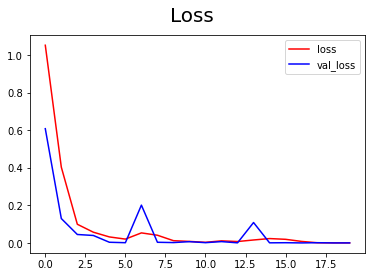

In [21]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="red", label="loss")
plt.plot(hist.history["val_loss"], color="blue", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper right")
plt.show()

The loss of both training data and validation data keeps decreasing, that means that there is no overfitting happening. It looks like the model already reached it best performance at 5 epochs but after that it has two peaks and it starts decreasing againg around 13 epochs.

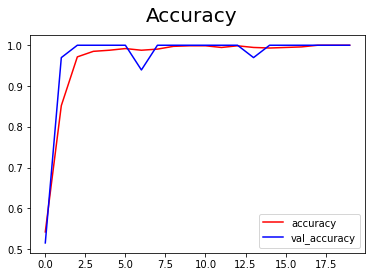

In [22]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="red", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="blue", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="lower right")
plt.show()

The same thing but in the opposite way is happening to the accuracy. Both validation and training accuracy keeps increasing, which is a good sign and means that the model is predicting very well. Again two peaks are visible but it looks like it reached its best performance after around 13 epochs.

## Evaluate the model

Now the test data is used to evaluate the model on unseen data. Therefore precision, recall and accuracy are first initialized. Then the data is accessed through batches and the class is predicted with the CNN model.

In [23]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [24]:
for batch in test_data.as_numpy_iterator():
    x, y = batch
    y_predicted = CNN.predict(x)
    precision.update_state(y, y_predicted)
    recall.update_state(y, y_predicted)
    accuracy.update_state(y, y_predicted)

In [25]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:0.9615384340286255, Recall:1.0, Accuracy:0.9791666865348816


Precision, recall and accurarcy are nearly all 100% which means the model is classifing the pictures almost flawless.

## Test with own picture

Additionaly, a piece of code was added to enter a random picture that was not found in the test or training folder. In that way another evaluation is done on how well the model is performing.

In [26]:
normal_dir = "normal.jpeg"
burnt_dir = "burnt.jpeg"

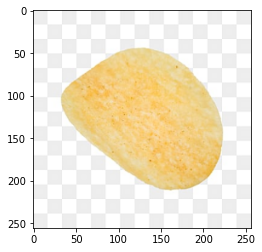

In [27]:
img = mpimg.imread(normal_dir)
imgplot = plt.imshow(img)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [29]:
y_predicted = CNN.predict(np.expand_dims(resize/255, 0))
if y_predicted > 0.5:
    print(f"potato ship is not defective")
else: 
    print(f"potato chip is defective")

potato ship is not defective


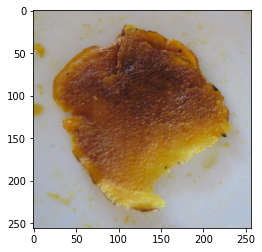

In [30]:
img = mpimg.imread(burnt_dir)
imgplot = plt.imshow(img)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
y_predicted = CNN.predict(np.expand_dims(resize/255, 0))
if y_predicted > 0.5:
    print(f"potato ship is not defective")
else: 
    print(f"potato chip is defective")

potato chip is defective


When inserting a random picture found on the internet, the model predicts the class accurately. 

## Discussion

The trained model of this machine learning pipeline has provided a tool to classify images of potato chips as defective or not defective. This solution can be very helpful for PepsiCo which is the leading company in producing potato chips. PepsiCo needs to perform a quality check based on the visual factor. Not only are burnt or defective potato chips bad for the acceptance by consumers but it also reflects the amount of acrylamide which can not reach a certain level for health reasons.  

The evaluation of the performance shows that the model is very high in accuracy. PepsiCo could insert this model to gain time and manpower in its quality control process. Eventually, the reputation of the brand, customer satisfaction and sales will increase. 

The generalizability of the results is limited while the model is trained on pictures of normal or plain potato chips. Using this model to analyze whether other flavored or colored potato chips are defective or not might be as accurate. Further research could include different looking potato chips as training data to improve this model. 

## References

Basic classification: Classify images of clothing (2017). Basic classification: Classify images of clothing  |  TensorFlow Core. [online] TensorFlow. Available at: https://www.tensorflow.org/tutorials/keras/classification.

Koo, J. (2021). Ways to Improve Quality Control in the Food Industry with Real-Time…. [online] Tulip. Available at: https://tulip.co/blog/quality-control-in-food-industry/#:~:text=Quality%20control%20is%20required%20for.

Makomba, M. (2021). 7 principles for quality control in your food manufacturing business. [online] Sage Advice South Africa. Available at: https://www.sage.com/en-za/blog/7-principles-for-quality-control-in-your-food-manufacturing-business/.

Navid, U. (2021). PepsiCo Lab Potato Chips Quality Control. [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/concaption/pepsico-lab-potato-quality-control [Accessed 18 Dec. 2022].

Nutrition, C. for F.S. and A. (2021). Acrylamide. FDA. [online] Available at: https://www.fda.gov/food/chemical-contaminants-food/acrylamide.

Pedreschi, F., Mery, D. and Marique, T. (2016). Chapter 22 - Quality Evaluation and Control of Potato Chips. [online] ScienceDirect. Available at: https://www.sciencedirect.com/science/article/pii/B9780128022320000220?via%3Dihub [Accessed 18 Dec. 2022].

Pramoditha, R. (2022). Coding a Convolutional Neural Network (CNN) Using Keras Sequential API. [online] Medium. Available at: https://towardsdatascience.com/coding-a-convolutional-neural-network-cnn-using-keras-sequential-api-ec5211126875.

Renotte, N. (2022). Build a Deep CNN Image Classifier with ANY Images. [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=jztwpsIzEGc&list=PLgNJO2hghbmiXg5d4X8DURJP9yv9pgjIu&index=2 [Accessed 18 Dec. 2022].

Statista (2017). Market share leading potato chip brands U.S. 2017  | Statista. [online] Statista. Available at: https://www.statista.com/statistics/262117/sales-share-of-the-leading-10-potato-chip-brands-in-the-us/.

TensorFlow. (2019). Load images with tf.data  |  TensorFlow Core. [online] Available at: https://www.tensorflow.org/tutorials/load_data/images.

Verma, M. (2022). Binary Classification Using Convolution Neural Network (CNN) Model. [online] Medium. Available at: https://medium.com/@mayankverma05032001/binary-classification-using-convolution-neural-network-cnn-model-6e35cdf5bdbb.